In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn import grid_search
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from pandas import Series
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, linear_model 
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
%matplotlib inline

C:\Users\Dan\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dan\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_csv("NFLPlaybyPlay2015.csv", dtype={'DefTwoPoint': str}, na_values=['NA'])


In [3]:
data['ydsnet_lag'] = data['ydsnet']
data.ydsnet_lag = data.ydsnet_lag.shift(+1)
data['posteamscore_lag'] = data['PosTeamScore']
data.posteamscore_lag = data.posteamscore_lag.shift(+1)
data['defteamscore_lag'] = data['DefTeamScore']
data.defteamscore_lag = data.defteamscore_lag.shift(+1)
data['scorediff_lag'] = data['ScoreDiff']
data.scorediff_lag = data.scorediff_lag.shift(+1)



In [4]:
def mask_first(x):
    result = np.ones_like(x)
    result[0] = 0
    return result
mask = data.groupby(['GameID'])['GameID'].transform(mask_first).astype(bool)
data = data.loc[mask]
data.drop(data.index[len(data)-1])



,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,...,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Season,ydsnet_lag,posteamscore_lag,defteamscore_lag,scorediff_lag
1,51.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,15:00,15.0,3600.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,0.0,0.0,0.0,0.0
2,72.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,14:21,15.0,3561.0,39.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,18.0,0.0,0.0,0.0
3,101.0,9/10/2015,2.015091e+09,1.0,1.0,2.0,14:04,15.0,3544.0,17.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,31.0,0.0,0.0,0.0
4,122.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,13:26,14.0,3506.0,38.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,31.0,0.0,0.0,0.0
5,159.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,12:42,13.0,3462.0,44.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,45.0,0.0,0.0,0.0
6,180.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,12:05,13.0,3425.0,37.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,56.0,0.0,0.0,0.0
7,199.0,9/10/2015,2.015091e+09,1.0,1.0,2.0,11:20,12.0,3380.0,45.0,...,10.0,0.0,0.0,0.0,0.0,2015.0,48.0,0.0,0.0,0.0
8,236.0,9/10/2015,2.015091e+09,1.0,1.0,2.0,10:53,11.0,3353.0,27.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,54.0,0.0,0.0,0.0
9,261.0,9/10/2015,2.015091e+09,1.0,1.0,3.0,10:28,11.0,3328.0,25.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,54.0,0.0,0.0,0.0
10,285.0,9/10/2015,2.015091e+09,1.0,1.0,4.0,9:44,10.0,3284.0,44.0,...,0.0,0.0,0.0,0.0,0.0,2015.0,54.0,0.0,0.0,0.0


In [5]:
df = data.copy()


#Extra Point
df['ExPointAborted'] = pd.get_dummies(df['ExPointResult'])["Aborted"]
df['ExPointMade']= pd.get_dummies(df['ExPointResult'])["Made"]
df['ExPointMissed']= pd.get_dummies(df['ExPointResult'])["Missed"]

#Two Point Conv
df['TwoPointSuc']= pd.get_dummies(df['TwoPointConv'])["Success"]
df['TwoPointFail']= pd.get_dummies(df['TwoPointConv'])["Failure"]

#Defense Two Point
df['DefTwoPointSuc']= pd.get_dummies(df['DefTwoPoint'])["Success"]
df['DefTwoPointFail']= pd.get_dummies(df['DefTwoPoint'])["Failure"]

# Punt Result
df['PuntResultClean']= pd.get_dummies(df['PuntResult'])["Clean"]
df['PuntResultBlocked']= pd.get_dummies(df['PuntResult'])["Blocked"]

#Play Type
df['KickoffPlay']= pd.get_dummies(df['PlayType'])["Kickoff"]
df['RunPlay']= pd.get_dummies(df['PlayType'])["Run"]
df['PassPlay']= pd.get_dummies(df['PlayType'])["Pass"]
df['SackPlay']= pd.get_dummies(df['PlayType'])["Sack"]
df['NoPlay']= pd.get_dummies(df['PlayType'])["No Play"]
df['FieldGoalPlay']= pd.get_dummies(df['PlayType'])["Field Goal"]
df['PuntPlay']= pd.get_dummies(df['PlayType'])["Punt"]
df['ExtraPointPlay']= pd.get_dummies(df['PlayType'])["Extra Point"]
df['QBKneelPlay']= pd.get_dummies(df['PlayType'])["QB Kneel"]
df['SpikePlay']= pd.get_dummies(df['PlayType'])["Spike"]
df['OnsideKickPlay']= pd.get_dummies(df['PlayType'])["Onside Kick"]

#Pass Outcome
df['CompletedPass']= pd.get_dummies(df['PassOutcome'])["Complete"]
df['IncompletePass']= pd.get_dummies(df['PassOutcome'])["Incomplete Pass"]

#Side of Field
df["OffenseSide"] = (df["SideofField"] == df["posteam"])

#Pass Length
df["ShortPass"] = pd.get_dummies(df['PassLength'])["Short"]
df["DeepPass"] = pd.get_dummies(df['PassLength'])["Deep"]

#Pass Location
df["LeftPass"]= pd.get_dummies(df['PassLocation'])["left"]
df["MiddlePass"]= pd.get_dummies(df['PassLocation'])["middle"]
df["RightPass"]= pd.get_dummies(df['PassLocation'])["right"]

#Run Location
df["LeftRun"]= pd.get_dummies(df['RunLocation'])["left"]
df["MiddleRun"]= pd.get_dummies(df['RunLocation'])["middle"]
df["RightRun"]= pd.get_dummies(df['RunLocation'])["right"]

#Run Gap
df["RunGapEnd"]= pd.get_dummies(df['RunGap'])["end"]
df["RunGapGuard"]= pd.get_dummies(df['RunGap'])["guard"]
df["RunGapTackle"]= pd.get_dummies(df['RunGap'])["tackle"]

#Return Result
df["ReturnResultTD"]= pd.get_dummies(df['ReturnResult'])["Touchdown"]
df["ReturnResultTouch"]= pd.get_dummies(df['ReturnResult'])["Touchback"]

#Offense Fumble Recovery
df["OffFumbleRecover"] = (df["RecFumbTeam"] == df["posteam"])

#Challenge Result
df["ChalOverturned"]= pd.get_dummies(df['ChalReplayResult'])["Reversed"]
df["ChalAccept"]= pd.get_dummies(df['ChalReplayResult'])["Upheld"]

#Penalty
df["OffPenalty"] = (df["PenalizedTeam"] == df["posteam"])

df

,Unnamed: 0,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,...,RightRun,RunGapEnd,RunGapGuard,RunGapTackle,ReturnResultTD,ReturnResultTouch,OffFumbleRecover,ChalOverturned,ChalAccept,OffPenalty
1,51.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,15:00,15.0,3600.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,False,0.0,0.0,False
2,72.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,14:21,15.0,3561.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,False
3,101.0,9/10/2015,2.015091e+09,1.0,1.0,2.0,14:04,15.0,3544.0,17.0,...,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,0.0,False
4,122.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,13:26,14.0,3506.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,False
5,159.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,12:42,13.0,3462.0,44.0,...,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,0.0,False
6,180.0,9/10/2015,2.015091e+09,1.0,1.0,1.0,12:05,13.0,3425.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,False
7,199.0,9/10/2015,2.015091e+09,1.0,1.0,2.0,11:20,12.0,3380.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,True
8,236.0,9/10/2015,2.015091e+09,1.0,1.0,2.0,10:53,11.0,3353.0,27.0,...,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,0.0,False
9,261.0,9/10/2015,2.015091e+09,1.0,1.0,3.0,10:28,11.0,3328.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,False
10,285.0,9/10/2015,2.015091e+09,1.0,1.0,4.0,9:44,10.0,3284.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,False


In [6]:
downs = [1,2,3,4] 
df = df[df['down'].isin(downs)]

# Features/Classifier selection.
#SackPlay is the dummy column that we need as our classifier for the prediction. 
df = df[['down','yrdline100','scorediff_lag', 'posteamscore_lag', 'defteamscore_lag',
         'ydstogo','TimeSecs','ydsnet_lag','SackPlay','Drive']]


#df[pd.isnull(df).any(axis=1)]
df = df[np.isfinite(df['posteamscore_lag'])]

In [7]:
# Train/Test Split
X, test = train_test_split(df, test_size = 0.2)

# Popping the classifier off the sets.
y = X.pop('SackPlay')
test_y = test.pop('SackPlay')

#implement the decisiontree model
clf = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=12, 
 min_weight_fraction_leaf=0.0, max_features=0.8, random_state=None, max_leaf_nodes=None, min_impurity_split=1e-07, presort=False)

#clf = RandomForestRegressor(n_jobs = -1, oob_score=True,n_estimators=100, min_samples_leaf=12, max_features=.8)

clf.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=0.8,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=12, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


probas = clf.predict(test)

print roc_auc_score(test_y,probas)

0.547234797013


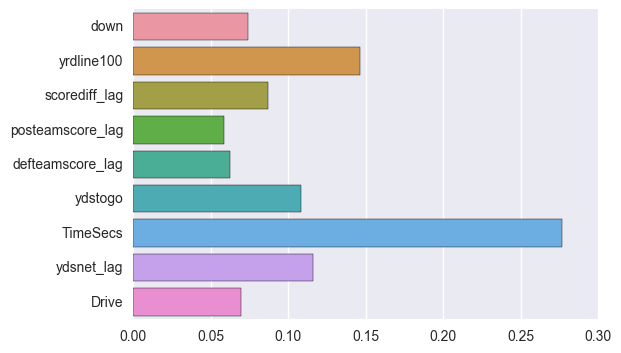

In [9]:
#show which variables have the most significant impact on sacks. 

x = range(X.shape[1])
sns.barplot(x = clf.feature_importances_, y = X.columns)
sns.despine(left=True, bottom=True)